In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import copy
import os

In [49]:
Ins = pd.read_csv('insurance.csv') # read the data as a data frame

In [50]:
Ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,-300000.00000
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
Numeric=Ins.dtypes[(Ins.dtypes=='int64') | (Ins.dtypes=='float64')].index.tolist()
Numeric

['age', 'bmi', 'children', 'charges']

In [52]:
Ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13033.587494
std,14.049960,6.098187,1.205493,14832.005284
min,18.000000,15.960000,0.000000,-300000.000000
25%,27.000000,26.296250,0.000000,4724.369462
50%,39.000000,30.400000,1.000000,9369.615750
75%,51.000000,34.693750,2.000000,16584.318158
max,64.000000,53.130000,5.000000,63770.428010


In [53]:
#5 point summary

In [54]:
for i in range(len(Numeric)):
    print("Five point summary :" , Numeric[i] )
    print("Min : " , np.percentile(Ins[Numeric[i]],0))
    Q3=np.percentile(Ins[Numeric[i]],75)
    Q1=np.percentile(Ins[Numeric[i]],25)
    IQR=Q3-Q1
    UL = Q3 +1.5*IQR
    LL = Q1 - 1.5*IQR
    print("L1 :", LL)
    print("Q1 : ", np.percentile(Ins[Numeric[i]], 25))
    print("Q2 : ", np.percentile(Ins[Numeric[i]], 50))
    print("Q3 : ", np.percentile(Ins[Numeric[i]], 75))
    print("Max : ", np.percentile(Ins[Numeric[i]],100))
    print("UL : ", UL)
    print("******************************")

Five point summary : age
Min :  18.0
L1 : -9.0
Q1 :  27.0
Q2 :  39.0
Q3 :  51.0
Max :  64.0
UL :  87.0
******************************
Five point summary : bmi
Min :  15.96
L1 : 13.7
Q1 :  26.29625
Q2 :  30.4
Q3 :  34.69375
Max :  53.13
UL :  47.290000000000006
******************************
Five point summary : children
Min :  0.0
L1 : -3.0
Q1 :  0.0
Q2 :  1.0
Q3 :  2.0
Max :  5.0
UL :  5.0
******************************
Five point summary : charges
Min :  -300000.0
L1 : -13065.553580000007
Q1 :  4724.3694625
Q2 :  9369.61575
Q3 :  16584.3181575
Max :  63770.42801
UL :  34374.241200000004
******************************


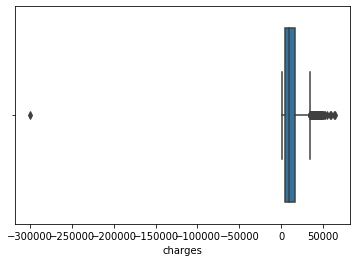

In [60]:
sns.boxplot(Ins["charges"])

In [63]:
Q1 = np.percentile(Ins['charges'],25)
Q3 = np.percentile(Ins['charges'],75)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1 -1.5*IQR
UL
Outliers = Ins[Ins['charges']>UL]['charges']
#Outliers = Ins[(Ins['charges']<LL) | (Ins['charges']>UL)]['charges']
Outliers.shape

(141,)

Text(0.5, 1.0, 'bmi-report')

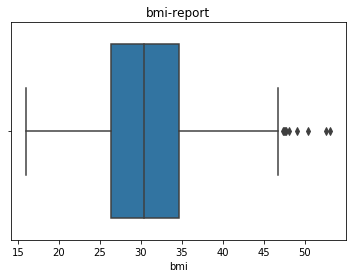

In [57]:
sns.boxplot(Ins['bmi'])
plt.title("bmi-report")

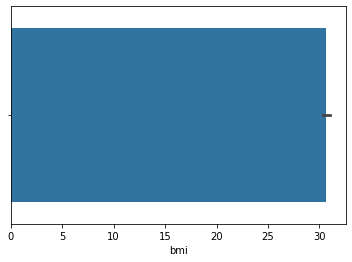

In [58]:
sns.barplot(Ins['bmi'])

Text(0.5, 1.0, 'Distribution of charges across region')

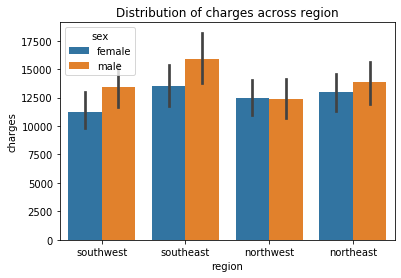

In [48]:
sns.barplot(Ins['region'],Ins['charges'], hue = Ins['sex'])
plt.title("Distribution of charges across region")

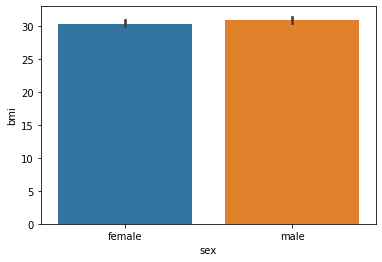

In [68]:
sns.barplot(Ins['sex'],Ins['bmi'])


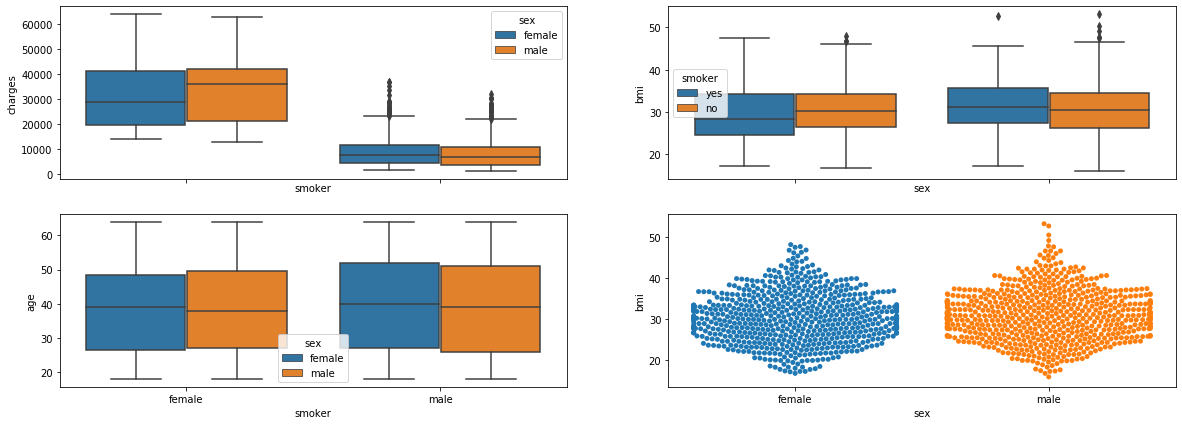

In [45]:
f, axes = plt.subplots(2,2, figsize=(20,7), sharex=True)
sns.boxplot(x='smoker',y='charges',hue='sex', data=Ins, ax=axes[0,0])
sns.boxplot(x='sex',y='bmi',hue='smoker', data=Ins, ax=axes[0,1])
sns.boxplot(x='smoker',y='age',hue='sex', data=Ins, ax=axes[1,0])
sns.swarmplot(x='sex',y='bmi', data=Ins, ax=axes[1,1])

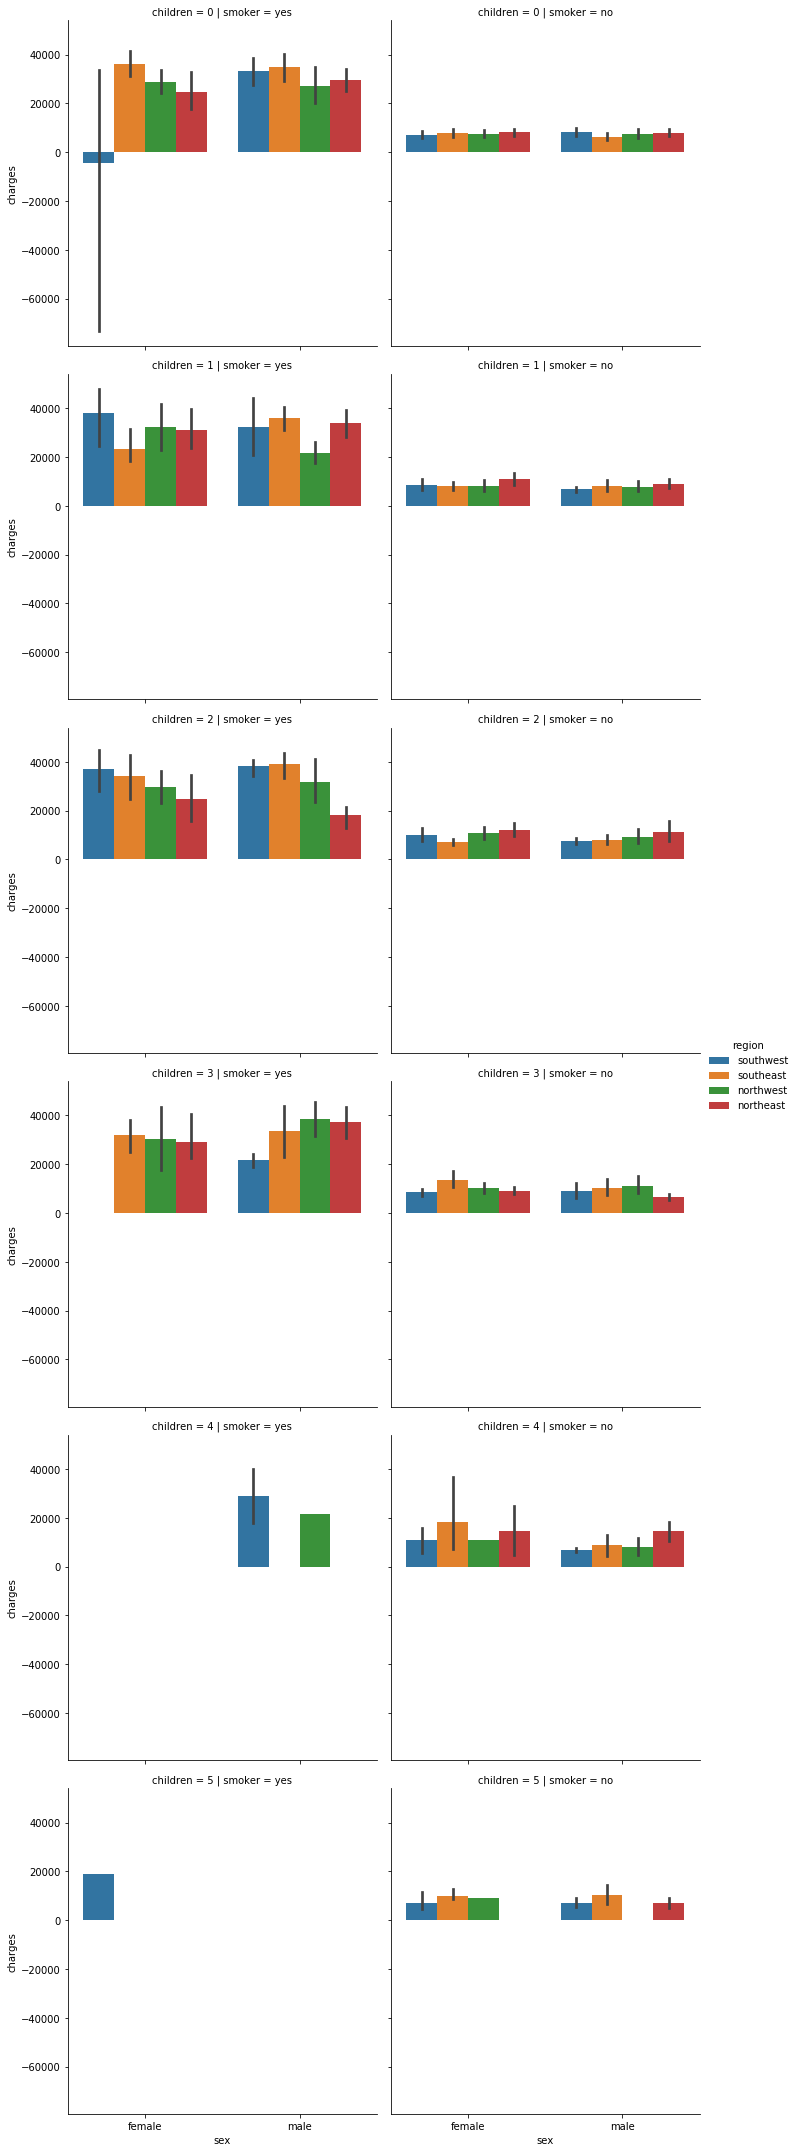

In [66]:
sns.catplot(x='sex',y='charges', hue = "region",col='smoker',row ='children', kind='bar', data=Ins)